# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import warnings


# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [2]:
# import and mount Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Using shape to determine rows and columns
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 1898 rows and 9 columns.


#### Observations:The data set has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
 #Determine the different data types per column
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The data types following the column: data type form are - order_id: int64; customer_id: int64, restaurant_name: object; cusine_type: object; cost_of_the_order: float64; day_of_the_week: object; rating: object; food_preparation_time: int64; and delivery_time: int64.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Check if there are any missing values in the data
missing_val = df.isnull().sum()
print(missing_val)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: There are no missing values in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Provide a statistical summary of the data
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:The minimum, average, and maximum time it takes for food to be prepared once an order is placed is 20 minutes, 27.371970, and 35 minutes respectively


### **Question 5:** How many orders are not rated?

In [ ]:
# Determine how many orders are not rated
rating_counts = df['rating'].value_counts()
print(rating_counts)


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations: There are 736 orders which have no rating


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

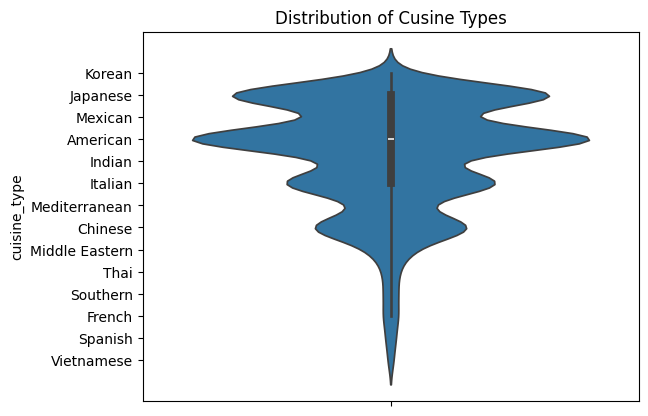

In [ ]:
# Determine the distribution of cuisine types
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(y=df['cuisine_type'])  # For a vertical violin plot
plt.title("Distribution of Cusine Types")
plt.show()

The American, Japanese and Italian cuisines have the highest frequencies, with the American having the highest frequency. The distribution on that end has the higher density.The interquartile range goes from Japanese to Italian, with a median cusine type of Amwrican. While on the lower end Thai, Southern, French, Spanish and vietnamese have the lowest freqency and thus the distribution is skewed towards these cuisines.

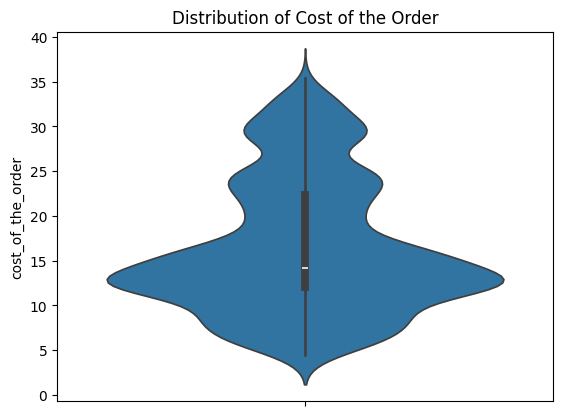

In [ ]:
# Determine the distribution of the cost of the order variable
sns.violinplot(y=df['cost_of_the_order'])  # For a vertical violin plot
plt.title("Distribution of Cost of the Order")
plt.show()

The interquartile range of the Cost of the Order distribution is from about 12 to 23 and the median cost per order is at 15. The distribution is most density around the cost 13 per order. The distribution is skewed towards the higher value orders, to the right.

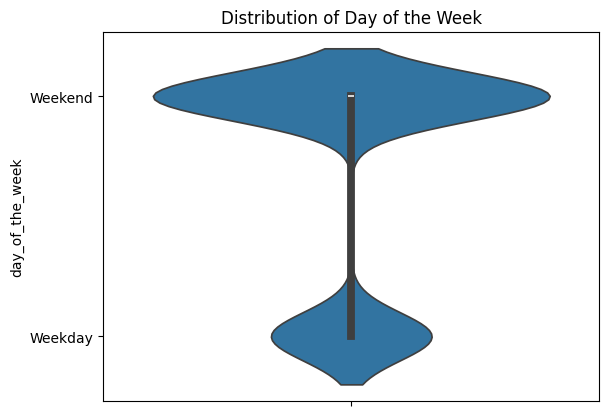

In [ ]:
# Determine the distribution of day of the week variable
sns.violinplot(y=df['day_of_the_week'])  # For a vertical violin plot
plt.title("Distribution of Day of the Week")
plt.show()

The distribution of Day of the Week is bi-modal, with one mode being in the week and another weekend. The density around the weekend is much higher than the density on the weekend. The median value of the data is weekend.

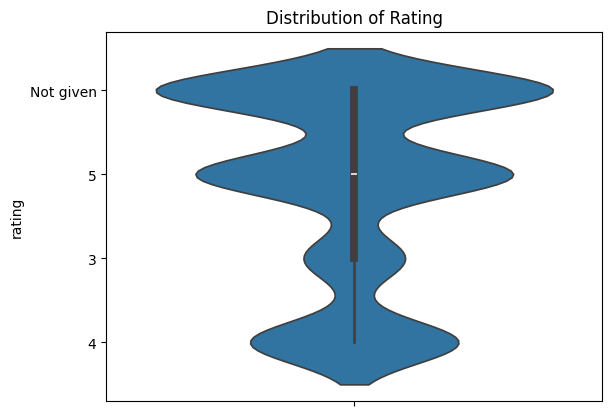

In [ ]:
# Determine the distribution of Rating variable
sns.violinplot(y=df['rating'])  # For a vertical violin plot
plt.title("Distribution of Rating")
plt.show()

The distribution on the Rating has the highest density on the ratings "Not Given." The median rate value is 5. While the mode is Not Given.

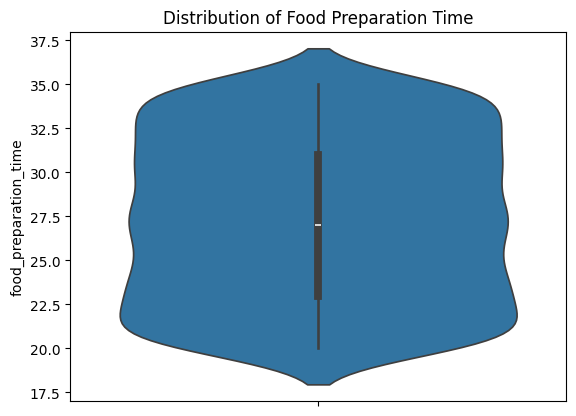

In [ ]:
# Determine the distribution of food preparation time
sns.violinplot(y=df['food_preparation_time'])  # For a vertical violin plot
plt.title("Distribution of Food Preparation Time")
plt.show()



The median food preparation time is 27.5 minutes and data has an interquartile range of about 21 to 31 minutes.

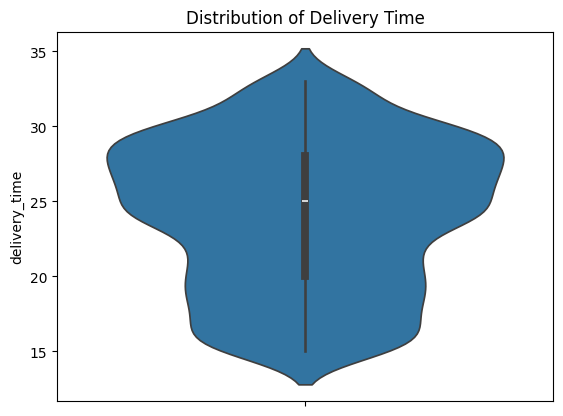

In [ ]:
# Determine the distribution of delivery_time
sns.violinplot(y=df['delivery_time'])  # For a vertical violin plot
plt.title("Distribution of Delivery Time")
plt.show()


The interquartile range of the delivery time is 20 to 28 minutes and the median delivery time is around 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Determine the top 5 restaurants in term of orders received and then retrieve the top 5
top_5_restaurant_names = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurant_names)



restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: The top 5 restaurants Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filtering for weekend orders
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

# Calculating the value counts for cuisine types on weekends
weekend_cuisine_counts = weekend_data['cuisine_type'].value_counts()
print(weekend_cuisine_counts)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: The most popular cuisine on the weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Filter orders where the cost is greater than $20

high_cost_orders = df[df['cost_of_the_order'] > 20]

# Retrieve the total number of orders
total_orders = df.shape[0]

# Retrieve integer value of hgh cost orders
num_high_cost_orders = high_cost_orders.shape[0]

# Calculate the percentage of high_cost_orders.

percentage_high_cost_orders = (num_high_cost_orders / total_orders) * 100
print(f"Percentage of orders costing more than $20: {percentage_high_cost_orders}%")


Percentage of orders costing more than $20: 29.24130663856691%


#### Observations: The percentage of orders that cost more than $20 is 29.24%


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Access the appropriate column and process the mean
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations: The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Group and count the number of orders placed by each customer
customer_order_counts = df.groupby('customer_id').size()

# Sort counts in descending order to identify the customers with the highest order counts.
# Select the top 3 from this sorted list.
top_3_customers = customer_order_counts.sort_values(ascending=False).head(3)

print(f"The top 3 most frequent customers are: {top_3_customers}")

The top 3 most frequent customers are: customer_id
52832    13
47440    10
83287     9
dtype: int64


#### Observations: The top 3 most frequent customers are:
customer 52832 with 13 orders, customer 47440 with 10 orders, and customer 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

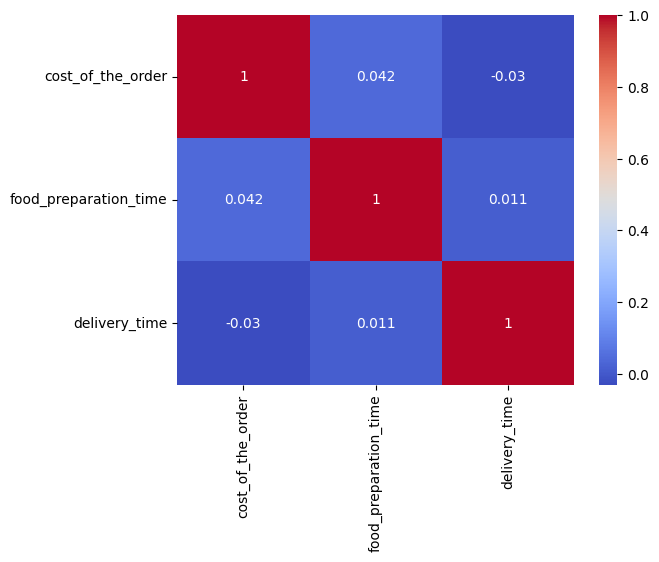

In [ ]:
# Computing the correlation matrix to understand the linear relationships between continuous variables
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


There is a direct correlation between food preparation time and cost of the order. With increaing preparation time food costs also go up.

There is an indirect correlation between delivery time and cost of the order as delivery time goes down costs go down.

There is a direct relationship between delivery time and food preparation time. They both increase together.

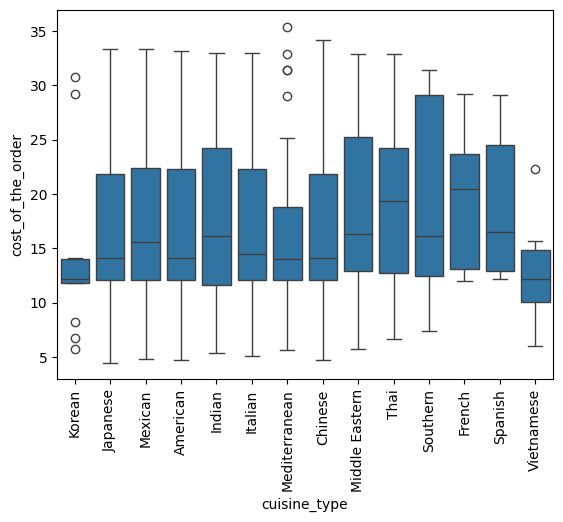

In [ ]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.show()


The most expensive median cost of order are French and Thai foods, which are 20 for French and about 19 for Thai food. The other cuisines have median cost of order around 15.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Convert 'rating' to convert numeric for analysis
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group restaurants by rating count and average rating
grouped_data = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Apply conditions: more than 50 ratings and average rating greater than 4
filtered_data = grouped_data[(grouped_data['count'] > 50) & (grouped_data['mean'] > 4)]

# Optional: Sort by average rating or count
sorted_data = filtered_data.sort_values(by='mean', ascending=False)

# Display the result
print(sorted_data)

                           count      mean
restaurant_name                           
The Meatball Shop             84  4.511905
Blue Ribbon Fried Chicken     64  4.328125
Shake Shack                  133  4.278195
Blue Ribbon Sushi             73  4.219178


#### Observations: The restaurants fulfilling the criteria are the The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Generate a new column with the heading revenue and calculate weighted revenue based on cost
df['revenue'] = np.where(df['cost_of_the_order'] > 20, df['cost_of_the_order'] * 0.25,
                         np.where(df['cost_of_the_order'] > 5, df['cost_of_the_order'] * 0.15, 0))

total_net_revenue = df['revenue'].sum()

# Output the total net revenue
print("Total Net Revenue Generated by the Company: $", total_net_revenue)


Total Net Revenue Generated by the Company: $ 6166.303


#### Observations: The total net revenue generated by the company is $6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the orders where total_time is greater than 60
orders_exceeding_60 = df[df['total_time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate the percentage
percentage_exceeding_60 = (orders_exceeding_60 / total_orders) * 100

# Output the percentage
print("Percentage of orders taking more than 60 minutes:", percentage_exceeding_60, "%")

Percentage of orders taking more than 60 minutes: 10.537407797681771 %


#### Observations: The percentatge of orders taking more than 60 minutes are 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Assuming df is your DataFrame
delivery_time_mean = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the mean delivery times
print(delivery_time_mean)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: The mean delivery time is 28.34 minutes on Weekdays and 22.47 minutes on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions: American restaurants sell more (415) with the largest vendor being Shake Shack with 219 orders followed by the Meatball Shop and then Blue Ribbon Sushi. Shake Shack received over 133 ratings with an average of 4.23 out 5.00. It is a clear favorite for online food delivery. Most food is delivered on weekends rather than weekdays. Thai, French, Spanish, Southern, and Vietnamese are the least liked cusines. About 70 percent of orders cost less than $20.00 which correlates to the mean price of most cusines apart from Thai and French.

### Recommendations: I would advise the company to invest in more American restaurants as they sell more (415) with the largest vendor being Shake Shack with 219 orders followed by the Meatball Shop and then Blue Ribbon Sushi. Shake Shack received over 133 ratings with an average of 4.23 out 5.00. They could also decrease their operating costs on weekdays as the share of orders coming is much lower than on weekends. They might also consider not partnering with Thai, French, Spanish, Southern, and Vietnamese as these receive the least orders as we saw the distribution of cusine types above

*  

---